In [7]:
!pip install yfinance

In [8]:
import datetime as dt
import yfinance as yf

company = 'AAPL'

#start and end dates of stock data, free to change
start = dt.datetime(2010,1,1)
end =  dt.datetime(2019,12,31)

# Read Stock Price Data from yahoo finance's website
df = yf.download(company, start , end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375155,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170471,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236229,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609901,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583107,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.002029,144114400


In [10]:
#resetting index of table and listing columns
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375155,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [11]:
#dropping date and adjusted close columns
#as they are not used in analysis
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

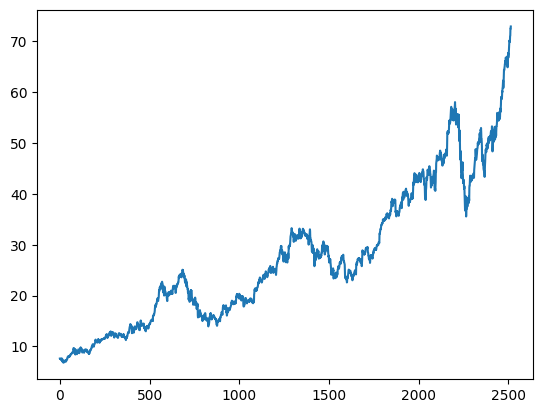

In [43]:
#plots closing price vs time for AAPL stock
plt.plot(df.Close)

In [39]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [40]:
#100 day moving average gives a general idea of how stock price will change
#avg of previous 100 days starting from day 101 
#takes avg of days 1-100, days 2-101,...etc
ma100 = df.Close.rolling(100).mean() #100 day MA of closing price
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

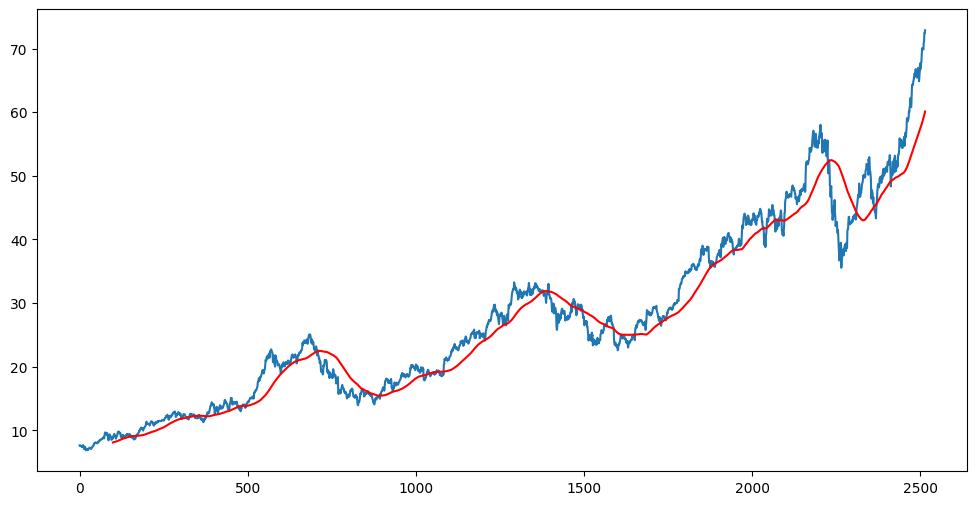

In [41]:
#plotting 100 day moving average vs stock price
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r') #100 day MA in red color

In [17]:
#200 day moving average
ma200 = df.Close.rolling(200).mean()  #(MA of closing price)
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

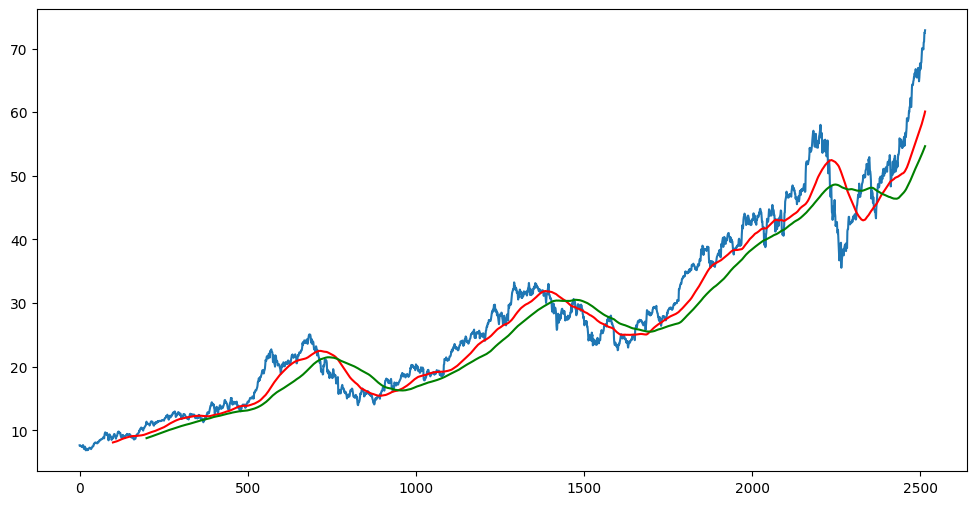

In [18]:
#plotting 200 day MA vs 100 day MA vs stock price
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r') #100 day MA in red color
plt.plot(ma200, 'g') #200 day MA in green color

In [19]:
df.shape

(2515, 5)

In [20]:
#Splittig data into a Training Set and a Testing Set
data_length = len(df)
data_training = pd.DataFrame(df['Close'][0:int(data_length*0.70)])
data_testing = pd.DataFrame(df['Close'][int(data_length*0.70):int(len(df))])
#70% of data is for training and 30% is for testing
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [21]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [22]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [23]:
!pip install scikit-learn

In [24]:
#closing price values are scaled from 0-1 per LTSM model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
#scaling training data
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [26]:
data_training_array.shape

(1760, 1)

In [27]:
x_train = []
y_train = []
#predicted price in y_train depends on previous 100 day prices in x_train
#closing price on 101st day(y_train) depends on previous 100 day prices(x_train)
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i]) #prev 100 days
    y_train.append(data_training_array[i, 0]) #next val after prev 100 days

#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(1660, 100, 1)

In [29]:
!pip install tensorflow

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
#ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
#defining LSTM model(neural network) with 4 layers
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))#deactivates 20% of units to better predict data



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

#dense layer connects previous layers
model.add(Dense(units = 1))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_3 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [36]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
#mean_squared_error is better optimized for time series analysis
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

52/52 [==============================] - 11s 130ms/step - loss: 0.0620
Epoch 2/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0122
Epoch 3/50
52/52 [==============================] - 10s 186ms/step - loss: 0.0108
Epoch 4/50
52/52 [==============================] - 9s 179ms/step - loss: 0.0086
Epoch 5/50
52/52 [==============================] - 9s 178ms/step - loss: 0.0089
Epoch 6/50
52/52 [==============================] - 10s 192ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 9s 179ms/step - loss: 0.0078
Epoch 8/50
52/52 [==============================] - 10s 201ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 10s 187ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0071
Epoch 11/50
52/52 [==============================] - 10s 191ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 10s 186ms/step - loss: 0.0065
Epoch 13/50
52/5

In [45]:
model.save('my_model.keras')

In [46]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [47]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [52]:
past_100_days = data_training.tail(100)

<class 'pandas.core.frame.DataFrame'>


In [53]:
#final_df = past_100_days.concat(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

#data testing has prepended 100 days data

In [54]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [55]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [56]:
input_data.shape

(855, 1)

In [57]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [59]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [60]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 31ms/step


In [61]:
y_predicted.shape

(755, 1)

In [62]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [63]:
scaler.scale_

array([0.02123255])

In [64]:
scale_factor = 1/0.02123255 #scaling up data
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

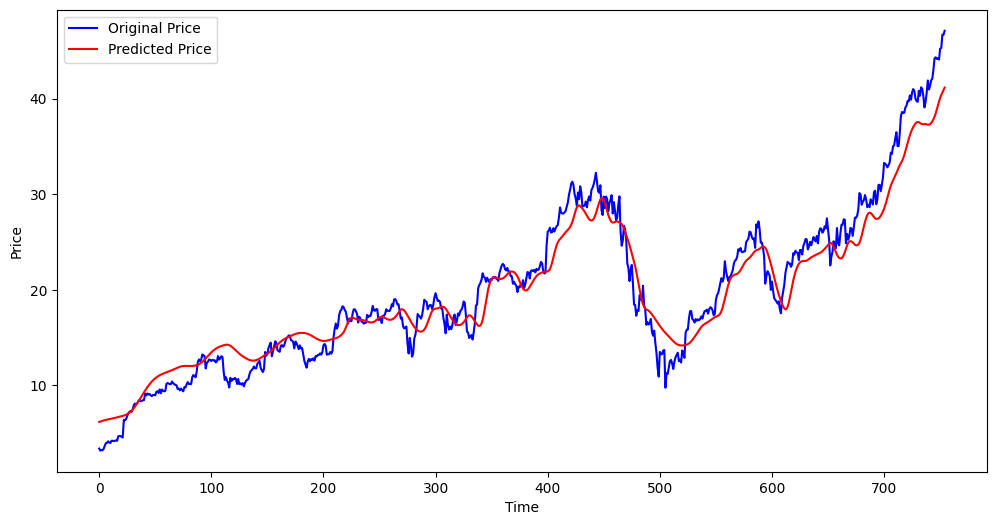

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()